# Short-Time Fourier Transform Model

Imports

In [1]:
import numpy as np
import math
from scipy.signal import get_window
import dft_model as dft # the content of this is described in notebook 01_dft_model
import matplotlib.pyplot as plt
import utility_functions as UF

In [2]:
%matplotlib inline

In [3]:
inputFile = '../sms-tools/sounds/piano.wav'
!play '../sms-tools/sounds/piano.wav'


../sms-tools/sounds/piano.wav:

 File Size: 339k      Bit Rate: 706k
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 44100Hz      
Replaygain: off         
  Duration: 00:00:03.85  

In:100%  00:00:03.85 [00:00:00.00] Out:170k  [      |      ] Hd:4.7 Clip:0    
Done.


In [4]:
window = 'hamming'
m = 1024
n = 1024 # fft size
h = 512  # hop size

In [5]:
# Read monophonic .wav file
fs, x = UF.wavread(inputFile)

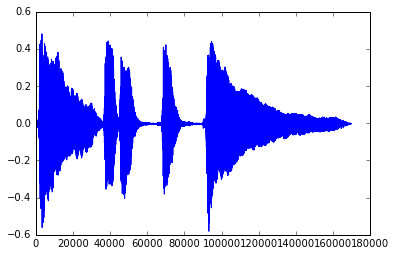

In [6]:
plt.plot(x)

In [7]:
# Compute anlaysis window
w = get_window(window, m)

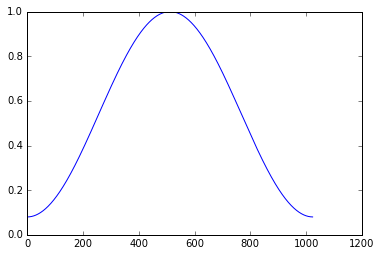

In [8]:
plt.plot(w)

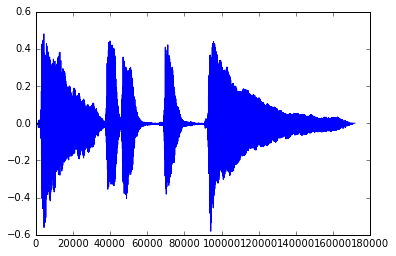

In [10]:
# half analysis window size by rounding  
hM1 = int(math.floor((m + 1) / 2)) 
# half analysis window size by floor
hM2 = int(math.floor(m / 2))     
# add zeros at beginning to center first window at sample 0
x = np.append(np.zeros(hM2), x) 
# add zeros at the end to analyze last sample                                                                        
x = np.append(x, np.zeros(hM2)) 

plt.plot(x); # <- final ; suppress matplotlib status output

In [11]:
# initialize sound pointer in middle of analysis window
pin = hM1
# last sample to start a frame
pend = x.size - hM1
# normalize analysis window
w = w / sum(w)
print pin
print pend

512
171136


In [12]:
# while sound pointer is smaller than last sample
while pin <= pend: 
    #if pin % 10 == 0:
    # Analysis------------------------
    # select one frame of input sound
    x1 = x[pin - hM1 : pin + hM2]

    # compute dft                    
    mX, pX = dft.dft_analysis(x1, w, n) 

    # Synthesis-----------------------
    # if first frame create output arrays   
    if pin == hM1:
        xmX = np.array([mX])
        xpX = np.array([pX])
    else:                   
        # append output to existing array
        xmX = np.vstack((xmX, np.array([mX])))
        xpX = np.vstack((xpX, np.array([pX])))
        # advance sound pointer
    pin += h               

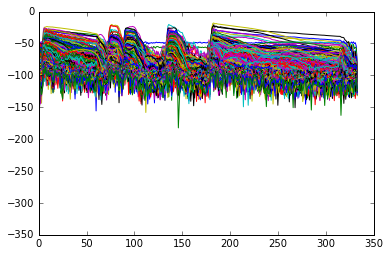

In [13]:
plt.plot(xmX);

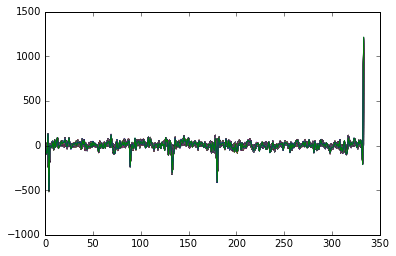

In [14]:
plt.plot(xpX);

In [15]:
mY, pY = xmX, xpX

In [23]:
nFrames = mY[:, 0].size
y = np.zeros(nFrames * h + hM1 + hM2)
pin = hM1

for i in range(nFrames):
    # compute idft
    y1 = dft.dft_synthesis(mY[i, :], pY[i, :], m)
    # overlap-add to generate output sound                             
    y[pin - hM1 : pin + hM2] += h * y1
    # advance sound pointer
    pin += h

In [24]:
# delete half of first window which was added in analysis section
y = np.delete(y, range(hM2))
# and delete the end
y = np.delete(y, range(y.size - hM1, y.size))

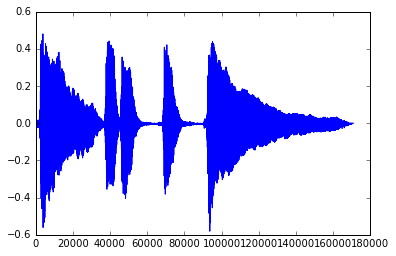

In [25]:
plt.plot(y);

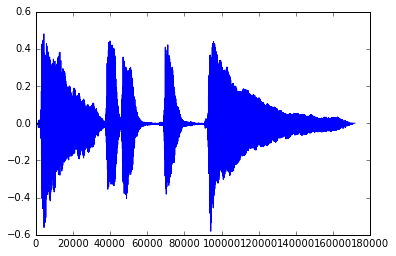

In [22]:
plt.plot(x)